# Projet Python

## Récupération des données

In [8]:
#Définition des librairies
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

###################################  Partie 1 récupération des données brutes dans le dictionnaire dataraw ########################################

# Spécifiez le chemin du dossier contenant les fichiers JSON
dossier = 'C:/Users/fanti/Music/universite paris-sorbonne/python/rameur/' 

# Initialiser un dictionnaire pour stocker les données brutes des fichiers JSON
dataraw = {}

# Parcourir tous les fichiers du dossier
for fichier in os.listdir(dossier):
    # Vérifier si le fichier a une extension .json
    if fichier.endswith(".json"):
        # Chemin complet vers le fichier JSON
        chemin_fichier = os.path.join(dossier, fichier)
        
        # Ouvrir et lire le contenu du fichier JSON
        with open(chemin_fichier, 'r', encoding='utf-8') as f:
            donnees = json.load(f)  # Charger les données du fichier
            nom_sans_extension = os.path.splitext(fichier)[0]  # Obtenir le nom de fichier sans extension
            dataraw[nom_sans_extension] = donnees  # Ajouter les données au dictionnaire avec le nom de fichier


#################################  Partie 2 création d'un dictionnaire avec les données qui nous intéresse  ####################################

#Créer un dictionnaire avec les colonnes vides
dataclean = {
    "participant": [],
    "time": [],
    "spm": [],
    "avg_pace": [],

    "split_time_1": [], "split_time_2": [], "split_time_3": [], "split_time_4": [],
    "split_avg_pace_1": [], "split_avg_pace_2": [], "split_avg_pace_3": [], "split_avg_pace_4": [],
    "split_stroke_count_1": [], "split_stroke_count_2": [], "split_stroke_count_3": [], "split_stroke_count_4": [],
    "split_stroke_rate_1": [], "split_stroke_rate_2": [], "split_stroke_rate_3": [], "split_stroke_rate_4": [],

    "stroke_count": [], #nombre de rames , QUESTION1
    "pace_kmh": [], #vitesse moyenne kmh , QUESTION2
    "split_pace_kmh_1": [], "split_pace_kmh_2": [], "split_pace_kmh_3": [], "split_pace_kmh_4": [], #vitesse moyenne en kmh/500m QUESTION2
    "stroke_dist": [], #longueur moyenne totale parcourue par coup de rame , QUESTION2
    "split_stroke_dist_1": [], "split_stroke_dist_2": [], "split_stroke_dist_3": [], "split_stroke_dist_4": [] 
    #'split_stroke_dist_i' longueur moyenne parcourue par coup de rame/500m , QUESTION2
    
}

#################################  Partie 3 ajout des données dans notre dictionnaire dataclean  #############################################

#on crée une liste avec le nom de tous les fichiers JSON
noms_json = [fichier[:-5] for fichier in os.listdir(dossier) if fichier.endswith('.json')]
#on utilise la variable nfichier pour ajouter les données brutes pour chaque fichier
for nfichier in noms_json:

    # Parcourir les participants dans les données brutes
    for participant in dataraw[nfichier]['results']['participants']:
        
        # Ajouter les informations globales du participant
        dataclean['participant'].append(participant.get('participant'))
        dataclean['avg_pace'].append(participant.get('avg_pace'))
        dataclean['spm'].append(participant.get('spm'))
        dataclean['time'].append(participant.get('time'))
        dataclean['stroke_count'].append(participant.get('stroke_count'))
        dataclean['pace_kmh'].append(participant.get('pace_kmh'))
        dataclean['stroke_dist'].append(participant.get('stroke_dist'))
       
        
        # Parcourir les splits et les ajouter au dictionnaire
        for i, split in enumerate(participant['splits'][:4]):  # Limiter à 4 splits
            dataclean[f'split_time_{i+1}'].append(split.get('split_time'))
            dataclean[f'split_avg_pace_{i+1}'].append(split.get('split_avg_pace'))
            dataclean[f'split_stroke_count_{i+1}'].append(split.get('split_stroke_count'))
            dataclean[f'split_stroke_rate_{i+1}'].append(split.get('split_stroke_rate'))
            dataclean[f'split_pace_kmh_{i+1}'].append(split.get('split_pace_kmh'))    
            dataclean[f'split_stroke_dist_{i+1}'].append(split.get('split_stroke_dist'))
            
#################################  Partie 4 création du dataframe #########################################################################
# Maintenant, dataclean est prêt à être converti en DataFrame
df = pd.DataFrame(dataclean)

#on active l'option pour afficher toutes les colonnes du dataframe pour éviter d'avoir des points "..."
pd.set_option('display.max_columns', None)

# Afficher le DataFrame
#display(df)

## Question 1

Extraire les données des fichiers et les placer dans un tableau restituant pour chaque rameur sa performance, à savoir son temps sur 2000m, la cadence moyenne sur 2000m, le nombre de coups de rames sur 2000m, le temps sur chaque portion de 500m, la cadence moyenne sur chaque portion de 500m, le nombre de coups de rame sur chaque portion de 500m. Le tableau aura une ligne par rameur.



In [10]:
#Question 1

#calcul du nombre de rames sur 2000m
df['stroke_count'] = df['split_stroke_count_1'] + df['split_stroke_count_2'] + df['split_stroke_count_3'] + df['split_stroke_count_4']


variables = [
    "participant", #nom du participant
    "time", #temps total
    "spm", #cadence moyenne sur 2000m
    "stroke_count", #nombre de coups de rame sur 2000m
    "split_avg_pace_1", "split_avg_pace_2", "split_avg_pace_3", "split_avg_pace_4", #temps sur chaque portion de 500m
    "split_stroke_rate_1", "split_stroke_rate_2", "split_stroke_rate_3", "split_stroke_rate_4", #cadence moyenne sur chaque portion de 500m
    "split_stroke_count_1", "split_stroke_count_2", "split_stroke_count_3", "split_stroke_count_4" #nombre de coups de rame sur chaque portion de 500m
]

display (df[variables])

,participant,time,spm,stroke_count,split_avg_pace_1,split_avg_pace_2,split_avg_pace_3,split_avg_pace_4,split_stroke_rate_1,split_stroke_rate_2,split_stroke_rate_3,split_stroke_rate_4,split_stroke_count_1,split_stroke_count_2,split_stroke_count_3,split_stroke_count_4
0,Maxime,6:33.4,28,186,1:41.6,1:42.0,1:37.6,1:32.1,26,25,29,34,44,43,47,52
1,Célestin,7:01.8,28,199,1:43.1,1:46.9,1:47.3,1:44.4,27,25,28,34,46,44,50,59
2,Julien,7:47.0,26,210,1:56.4,2:00.5,1:55.2,1:54.8,25,24,28,31,48,49,54,59
3,Neve,8:12.4,27,229,2:03.5,2:07.2,2:02.8,1:58.8,26,25,28,33,54,52,58,65
4,Eric,7:57.3,27,219,1:59.4,2:01.2,2:01.2,1:55.5,28,26,27,29,56,53,54,56
5,Edouard,8:03.7,30,242,1:54.8,2:05.5,2:05.3,1:58.1,31,29,29,31,59,60,61,62
6,Baptiste,8:21.1,24,208,1:58.6,2:05.4,2:10.7,2:06.5,27,24,23,27,53,50,49,56
7,Loïs,8:24.1,30,254,1:59.1,2:10.2,2:09.4,2:05.4,31,29,30,32,61,62,65,66
8,Usama,7:54.8,27,214,1:52.8,2:02.3,2:03.1,1:56.7,28,26,25,29,53,53,52,56
9,Noé,8:05.8,34,280,1:55.7,2:03.6,2:04.6,2:01.9,35,33,34,36,68,67,71,74


## Question 2

En déduire pour chaque participant la vitesse moyenne en km/h sur 2000m, la vitesse moyenne en km/h sur chaque portion de 500m, la longueur moyenne parcourue par coup de rame sur 2000m, la longueur moyenne parcourue par coup de rame sur chaque portion de 500m.

In [12]:
#### Question 2

########### Calcul de la vitesse moyenne en kmH sur 2000m ##########
# Soit 'pace_kmh' la vitesse en km/h et 'split_time_i' le temps par portion de 500m en décasecondes
# Pour calculer 'pace_kmh', nous avons utilisé la formule suivante: pace_kmh = 2km / [(somme des 'split_time_i') divisé par 36000das pour passer en heure]

df['pace_kmh'] = round(2 / ( (df['split_time_1'] + df['split_time_2'] + df['split_time_3'] + df['split_time_4']) /36000 ), 2)

########## Calcul de la vitesse moyenne en kmH sur chaque 500m ##########
# Soit 'split_pace_kmh_' la vitesse en km/h pour chaque portion de 500m. 
# Pour calculer 'split_pace_kmh_', nous avons utilisé la formule suivante : split_pace_kmh_ = 0.5km / ('split_time_i')

# Fonction pour calculer convertir la vitesse par portion en km/h
def pace_fct(x):
    y = round(0.5 / (x / 36000 ), 2)
    return y

# Boucle pour les 4 portions de 500m
for  i in range (1, 5):
    df[f'split_pace_kmh_{i}'] = df[f'split_time_{i}'].apply(pace_fct)



########## Longueur moyenne de parcourue par coup de rame sur 2000m ##########
# Soit 'stroke_dist' la longueur moyenne totale par coup de rame par metre et 'stroke_count' le nombre de coup de rame total
# Pour calculer la longueur moyenne, nous avons utilisé la formule suivante : 'stroke_dist' = 2000m / 'stroke_count_i'
df['stroke_dist'] = round(2000 / (df['stroke_count']), 2)


########## Longueur moyenne parcourue par coup de rame sur chaque portion de 500m ##########
# Soit 'split_stroke_dist_i' la longueur moyenne parcourue par coup de rame pour 500m et 'split_stroke_count_i'le nombre de coup de rame total par portion
# Pour calculer la longueur moyenne, nous avons utilisé la formule suivante : 'stroke_dist_i' = 500m / 'split_stroke_count_i'

# Fonction pour calculer le nombre de coups de rame par portion de 500m
def strokedist_fct(x):
    y = round(500 / x, 2)
    return y

# Boucle pour les 4 portions de 500m
for  i in range (1, 5):
    df[f'split_stroke_dist_{i}'] = df[f'split_stroke_count_{i}'].apply(strokedist_fct)


# Données à afficher sur le DataFrame
variables = [
    "participant", #nom du participant
    "time", #temps total
    'pace_kmh', #vitesse moyenne en kmH sur 2000m
    'split_pace_kmh_1', #vitesse moyenne en kmH de 0 à 500m
    'split_pace_kmh_2', #vitesse moyenne en kmH de 500 à 1000m
    'split_pace_kmh_3', #vitesse moyenne en kmH de 1000 à 1500m
    'split_pace_kmh_4', #vitesse moyenne en kmH de 1500 à 2000m
    'stroke_dist', #longueur moyenne de parcourue par coup de rame sur 2000m
    'split_stroke_dist_1', #longueur moyenne parcourue par coup de rame de 0 à 500m
    'split_stroke_dist_2', #longueur moyenne parcourue par coup de rame de 500 à 1000m
    'split_stroke_dist_3', #longueur moyenne parcourue par coup de rame de 1000 à 1500m
    'split_stroke_dist_4' #longueur moyenne parcourue par coup de rame de 1500 à 2000m
]

display (df[variables])

,participant,time,pace_kmh,split_pace_kmh_1,split_pace_kmh_2,split_pace_kmh_3,split_pace_kmh_4,stroke_dist,split_stroke_dist_1,split_stroke_dist_2,split_stroke_dist_3,split_stroke_dist_4
0,Maxime,6:33.4,18.31,17.72,17.65,18.44,19.54,10.75,11.36,11.63,10.64,9.62
1,Célestin,7:01.8,17.07,17.46,16.84,16.78,17.24,10.05,10.87,11.36,10.00,8.47
2,Julien,7:47.0,15.42,15.46,14.94,15.62,15.68,9.52,10.42,10.20,9.26,8.47
3,Neve,8:12.4,14.63,14.57,14.15,14.66,15.15,8.73,9.26,9.62,8.62,7.69
4,Eric,7:57.3,15.08,15.08,14.85,14.85,15.58,9.13,8.93,9.43,9.26,8.93
5,Edouard,8:03.7,14.89,15.68,14.34,14.37,15.24,8.26,8.47,8.33,8.20,8.06
6,Baptiste,8:21.1,14.37,15.18,14.35,13.77,14.23,9.62,9.43,10.00,10.20,8.93
7,Loïs,8:24.1,14.28,15.11,13.82,13.91,14.35,7.87,8.20,8.06,7.69,7.58
8,Usama,7:54.8,15.16,15.96,14.72,14.62,15.42,9.35,9.43,9.43,9.62,8.93
9,Noé,8:05.8,14.82,15.56,14.56,14.45,14.77,7.14,7.35,7.46,7.04,6.76


## Question 3

Placer sur un graphique admettant en abscisse la cadence moyenne sur 500 et en ordonnée la longueur moyenne du coup sur 500 tous les points correspondant aux enregistrements sur 500m. A quelle cadence la vitesse maximale est-elle atteinte ? A quel point cela correspond-il sur le graphique ?

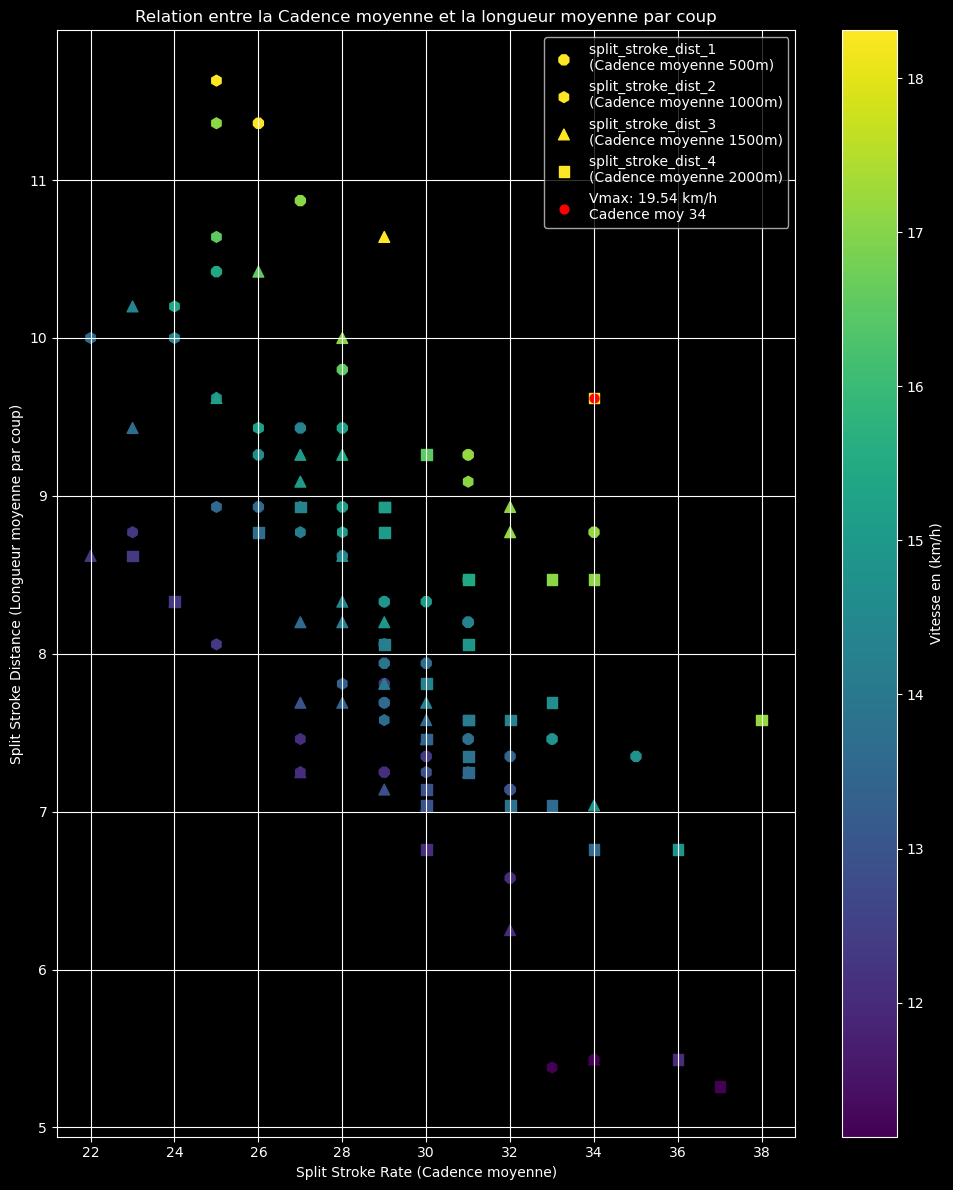

In [14]:
#### Question 3

########### Définition de la taille et de la longueur du grahe ##########
plt.style.use('dark_background')
plt.figure(figsize=(10, 12))


########## On ajoute les données dans notre graphe ##########
plt.scatter(df['split_stroke_rate_1'], df['split_stroke_dist_1'],c= df['pace_kmh'], cmap = 'viridis',
            marker = '8', s = 60, label='split_stroke_dist_1 \n(Cadence moyenne 500m)')
plt.scatter(df['split_stroke_rate_2'], df['split_stroke_dist_2'],c= df['pace_kmh'], cmap = 'viridis',
            marker = 'h', s = 60, label='split_stroke_dist_2 \n(Cadence moyenne 1000m)')
plt.scatter(df['split_stroke_rate_3'], df['split_stroke_dist_3'],c= df['pace_kmh'], cmap = 'viridis',
            marker = '^', s = 60, label='split_stroke_dist_3 \n(Cadence moyenne 1500m)')
plt.scatter(df['split_stroke_rate_4'], df['split_stroke_dist_4'],c= df['pace_kmh'], cmap = 'viridis',
            marker = 's', s = 60, label='split_stroke_dist_4 \n(Cadence moyenne 2000m)')

plt.colorbar(label='Vitesse en (km/h)')


########## Mise en évidence de la Vmax et de la cadence moyenne ##########
# Extraire les colonnes de split_pace
pace_columns = ['split_pace_kmh_1', 'split_pace_kmh_2', 'split_pace_kmh_3', 'split_pace_kmh_4']

# Trouver le nom de la colonne avec la valeur maximale (sur tout le DataFrame)
max_pace_column = df[pace_columns].idxmax(axis=1)  # On récupère ici un Series avec le nom de la colonne sur chaque ligne où ce trouve la Vmax

# Trouver l'index (numéro de ligne) et la valeur maximale dans cette colonne
max_pace_row = df[pace_columns].max(axis=1).idxmax()  # Trouver l'index de la ligne avec la plus grande valeur
max_pace_value = df.loc[max_pace_row, max_pace_column[max_pace_row]]  # Valeur max

# On associe ici le numéro de ligne avec le nom des colonnes de la cadence et de la longueur moyenne
stroke_rate_column = 'split_stroke_rate_' + max_pace_column[max_pace_row][-1]  # Générer le nom de la colonne associée
stroke_dist_column = 'split_stroke_dist_' + max_pace_column[max_pace_row][-1]  # Générer le nom de la colonne associée    

# Trouver la colonne de stroke rate et dist associée
max_rate_value = df.loc[max_pace_row, stroke_rate_column]
max_dist_value = df.loc[max_pace_row, stroke_dist_column]

# On trace le point en rouge
plt.scatter(max_rate_value, max_dist_value, color='red', s=40, 
            label=f"Vmax: {max_pace_value} km/h \nCadence moy {max_rate_value}", )


########## Mise en forme du graphe##########
# Ajouter la barre de couleur, les labels, le titre et la légende

plt.xlabel('Split Stroke Rate (Cadence moyenne)')
plt.ylabel('Split Stroke Distance (Longueur moyenne par coup)')
plt.title('Relation entre la Cadence moyenne et la longueur moyenne par coup')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Aller plus loin 

Afin de vous départager (novices vs expérimentés), je vous demande dans cette partie 
d’innover. Vous pourrez par exemple faire des analyses sur la base de données construite, faire 
des statistiques, réaliser des graphiques, un dashboard, utiliser des données externes 
(champions d’aviron par exemple). Faites parler votre imagination et votre créativité…

In [17]:
# la liste de tout nos participants



In [18]:
import numpy as np 


# Liste des noms masculins et féminins
nom_masculin = ['Maxime', 'Célestin', 'Julien', 'Eric', 'Edouard', 'Baptiste', 'Lois', 'Usama', 'Noé', 'Emilien', 'Tom', 'Ivan', 'Amaury', 'Thomas', 'Jerome','Corentin','Hervé']
nom_feminin = ['Neve', 'Jacqueline', 'Léa', 'Orlane', 'Anaë', 'Alice', 'Lison', 'Charlotte', 'Merle', 'Léonore', 'Valérie', 'Dominique', 'Nancy', 'Eloise', 'Julie', ]

# Ajouter une colonne 'sexe' en fonction des noms des participants
df['sexe'] = np.where(df['participant'].isin(nom_masculin), 'homme', 'femme')


# afficher du DataFrame
display(df[['participant', 'sexe']])

,participant,sexe
0,Maxime,homme
1,Célestin,homme
2,Julien,homme
3,Neve,femme
4,Eric,homme
5,Edouard,homme
6,Baptiste,homme
7,Loïs,femme
8,Usama,homme
9,Noé,homme


In [43]:
import numpy as np
import pandas as pd

# Créer un dictionnaire avec des colonnes vides
dataclean = {
    "participant": [],
    "sexe": [],
    "calories_split_1": [],  
    "calories_split_2": [],  
    "calories_split_3": [],  
    "calories_split_4": []   
}

# Liste des noms masculins et féminins
nom_masculin = ['Maxime', 'Célestin', 'Julien', 'Eric', 'Edouard', 'Baptiste', 'Lois', 'Usama', 'Noé', 'Emilien', 'Tom', 'Ivan', 'Amaury', 'Thomas', 'Jerome', 'Corentin', 'Hervé']
nom_feminin = ['Neve', 'Jacqueline', 'Léa', 'Orlane', 'Anaë', 'Alice', 'Lison', 'Charlotte', 'Merle', 'Léonore', 'Valérie', 'Dominique', 'Nancy', 'Eloise', 'Julie']

# Extraire les données des JSON (présentées dans la variable 'dataraw')
for nfichier in noms_json:
    # Parcourir les participants dans les données brutes
    for participant in dataraw[nfichier]['results']['participants']:
        # Ajouter le participant
        dataclean['participant'].append(participant.get('participant'))
        
        # Déterminer le sexe en fonction du nom du participant
        sexe = 'homme' if participant['participant'] in nom_masculin else 'femme'
        dataclean['sexe'].append(sexe)
        
        # Parcourir les splits et ajouter les calories pour chaque split
        splits = participant['splits'][:4]  
        for i in range(4):
            if i < len(splits):
                # Utiliser la clé 'split_calories' pour obtenir les calories spécifiques de chaque split
                dataclean[f'calories_split_{i+1}'].append(splits[i].get('split_calories', 0))  
            else:
                # Remplir avec 0 si le split n'existe pas
                dataclean[f'calories_split_{i+1}'].append(0)

# Convertir en DataFrame
df = pd.DataFrame(dataclean)

# Afficher uniquement les colonnes 'participant', 'sexe', et les calories par split
display(df[['participant', 'sexe', 'calories_split_1', 'calories_split_2', 'calories_split_3', 'calories_split_4']])


,participant,sexe,calories_split_1,calories_split_2,calories_split_3,calories_split_4
0,Maxime,homme,41,40,43,47
1,Célestin,homme,40,38,37,39
2,Julien,homme,34,33,34,34
3,Neve,femme,32,31,32,33
4,Eric,homme,33,32,32,34
5,Edouard,homme,35,31,31,33
6,Baptiste,homme,33,31,30,31
7,Loïs,femme,33,30,30,31
8,Usama,homme,36,32,32,34
9,Noé,homme,35,32,31,32


In [20]:
# Compter les participants par sexe
df.groupby('sexe')['participant'].count()

sexe
femme    16
homme    16
Name: participant, dtype: int64

In [45]:
# la moyenne des calories brulés pour chaque participant sur les 4 splits
df['calories_moyenne'] = df[[f'calories_split_{i+1}' for i in range(4)]].mean(axis=1)

# Grouper par sexe et par participant pour obtenir la moyenne des calories
calories_moyennes_sexe_participant = df.groupby(['sexe', 'participant'])['calories_moyenne'].mean().reset_index()

# Afficher le résultat
display(calories_moyennes_sexe_participant)


,sexe,participant,calories_moyenne
0,femme,Alice,33.00
1,femme,Anaë,27.50
2,femme,Charlotte,28.50
3,femme,Dominique,29.25
4,femme,Eloïse,30.25
5,femme,Jacqueline,31.00
6,femme,Julie,29.75
7,femme,Lison,29.50
8,femme,Loïs,31.00
9,femme,Léa,31.25


In [ ]:
import sys
print(sys.executable)